In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def change_figure_fontsize(ax, fs):
    ax.tick_params(axis='both', which='major', labelsize=fs)
    ax.tick_params(axis='both', which='minor', labelsize=fs-2)
    ax.xaxis.label.set_size(fs)
    ax.yaxis.label.set_size(fs)
    
def figure_fontsize(axes, fs):
    if isinstance(axes, list):
        for ax in axes:
            change_figure_fontsize(ax, fs)
    else:
        change_figure_fontsize(axes, fs)

In [3]:
scan_data = np.load('cavity_scan.npy')
ramp = scan_data[0]
demodulated = scan_data[1]

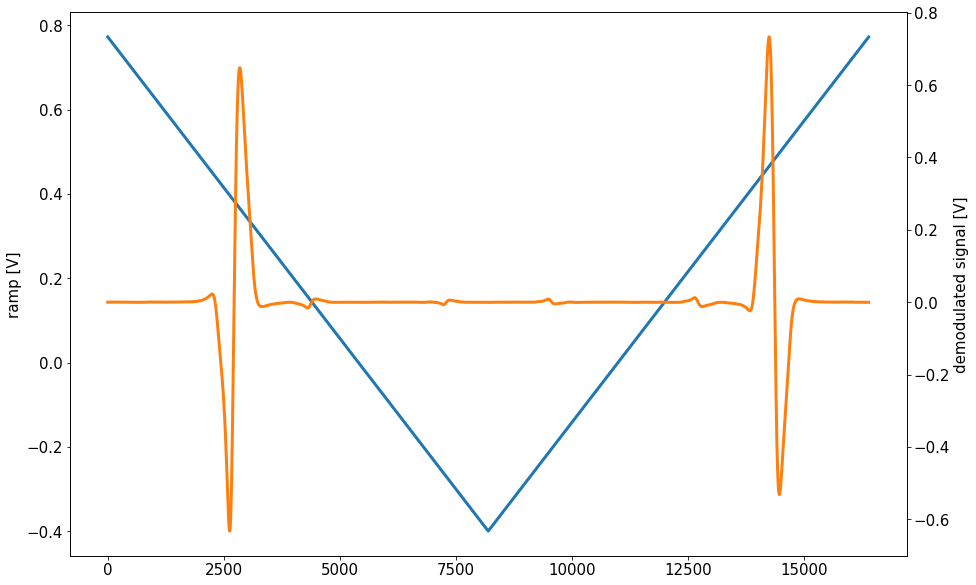

In [4]:
fig, ax = plt.subplots(figsize = (15,10))
ax1 = ax.twinx()

ax.plot(ramp, lw = 3)
ax1.plot(demodulated, 'C1', lw = 3)

ax.set_ylabel('ramp [V]')
ax1.set_ylabel('demodulated signal [V]')

figure_fontsize([ax, ax1], 15)

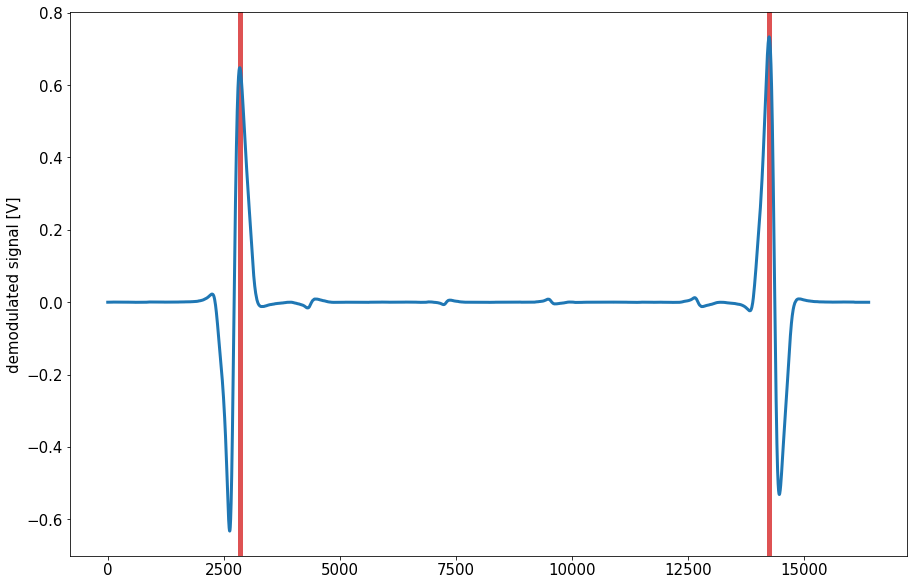

In [5]:
fig, ax = plt.subplots(figsize = (15,10))
[ax.axvline(l, color = 'C3', linewidth = 5, alpha = 0.8) for l in signal.find_peaks(demodulated, height = 0.2, distance = 1000)[0]]
ax.plot(demodulated, lw = 3)

ax.set_ylabel('demodulated signal [V]')

figure_fontsize(ax, 15)

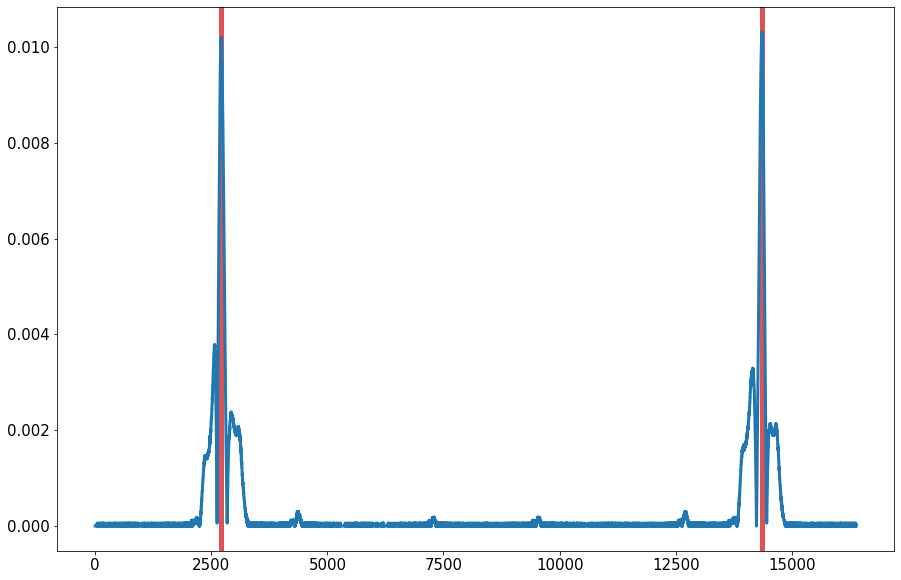

In [8]:
grad = np.abs(np.gradient(demodulated))
fig, ax = plt.subplots(figsize = (15,10))
[ax.axvline(l, color = 'C3', linewidth = 5, alpha = 0.8) for l in signal.find_peaks(grad, height = 0.005, distance = 1000)[0]]
ax.plot(grad, lw = 3)
figure_fontsize(ax, 15)

In [123]:
for peak_voltage in ramp[signal.find_peaks(demodulated, height = 0.2, distance= 1000)[0]]:
    print("Peak Voltage : {0:.3f} V".format(peak_voltage))
for peak_voltage in ramp[signal.find_peaks(grad, height = 0.005, distance= 1000)[0]]:
    print("Zero Crossing Voltage : {0:.3f} V".format(peak_voltage))

Peak Voltage : 0.366 V
Peak Voltage : 0.466 V
Zero Crossing Voltage : 0.384 V
Zero Crossing Voltage : 0.482 V


In [120]:
for p in signal.find_peaks(grad, height = 0.005, distance = 1000)[0]:
    print(p - demodulated.shape[0]/2)

-5475.0
6164.0
